<a href="https://colab.research.google.com/github/AmanullaChishty/Pytorch/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

## Data Creation and laoding

In [2]:
weight = 0.3
bias = 0.9
X = torch.arange(0,1,0.01).unsqueeze(dim=1)
y = weight*X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.9000],
         [0.9030],
         [0.9060],
         [0.9090],
         [0.9120],
         [0.9150],
         [0.9180],
         [0.9210],
         [0.9240],
         [0.9270]]))

In [3]:
# Splitting the data into train and test
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

In [4]:
len(X_train),len(y_train),len(X_test),len(y_test)

(80, 80, 20, 20)

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training Data")
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing Data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")
  plt.legend(prop={"size":14})

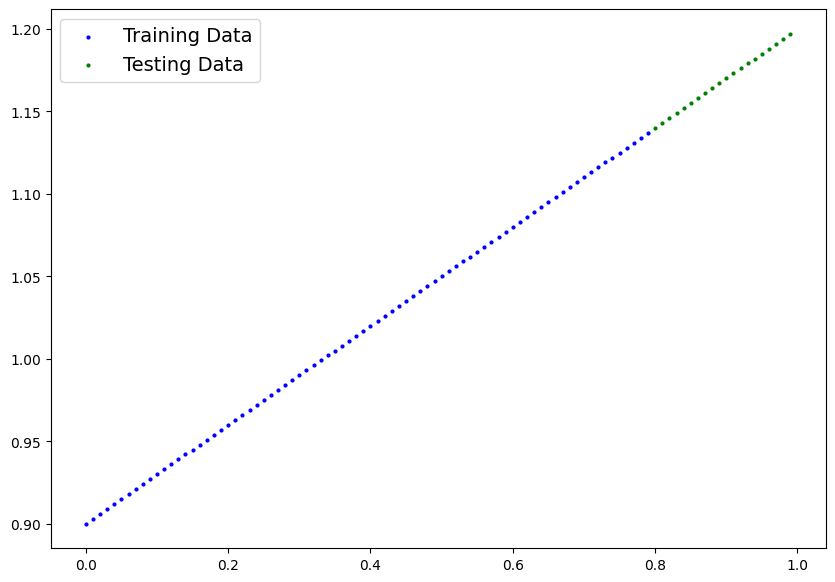

In [6]:
plot_predictions()

## Building a Linear Regression Model

In [7]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.weights*x + self.bias

In [8]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Testing model without training

In [10]:
with torch.inference_mode():
  y_preds = model_0(X_test)

In [11]:
len(y_preds),len(X_test)

(20, 20)

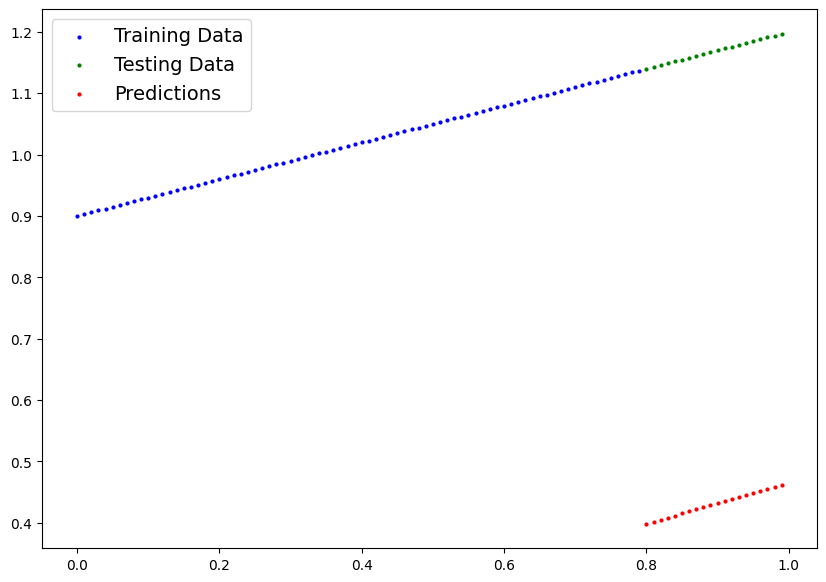

In [12]:
plot_predictions(predictions=y_preds)

## Train Model

In [13]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [17]:
torch.manual_seed(42)
epochs = 200
train_loss_values = []
test_loss_values = []
epoch_count = []
for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred,y_test.type(torch.float))

  if epoch%20 == 0:
    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    epoch_count.append(epoch)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")


Epoch: 0 | Loss: 0.00370177929289639 | Test Loss: 0.006489443592727184
Epoch: 20 | Loss: 0.00370177929289639 | Test Loss: 0.006489443592727184
Epoch: 40 | Loss: 0.00370177929289639 | Test Loss: 0.006489443592727184
Epoch: 60 | Loss: 0.00370177929289639 | Test Loss: 0.006489443592727184
Epoch: 80 | Loss: 0.00370177929289639 | Test Loss: 0.006489443592727184
Epoch: 100 | Loss: 0.00370177929289639 | Test Loss: 0.006489443592727184
Epoch: 120 | Loss: 0.00370177929289639 | Test Loss: 0.006489443592727184
Epoch: 140 | Loss: 0.00370177929289639 | Test Loss: 0.006489443592727184
Epoch: 160 | Loss: 0.00370177929289639 | Test Loss: 0.006489443592727184
Epoch: 180 | Loss: 0.00370177929289639 | Test Loss: 0.006489443592727184


Text(0, 0.5, 'Loss')

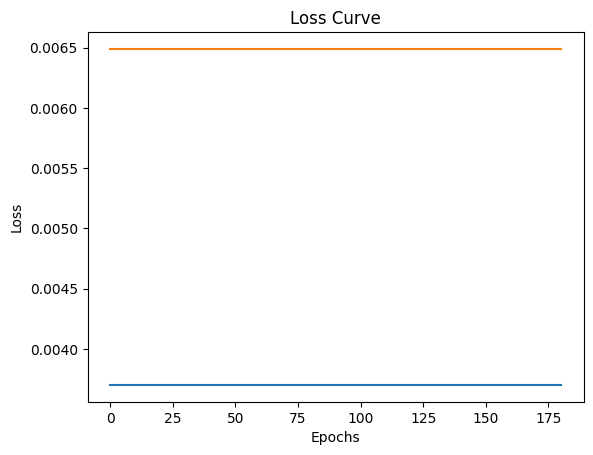

In [18]:
# plotting loss curve
plt.plot(epoch_count,train_loss_values,label="Train Loss")
plt.plot(epoch_count,test_loss_values,label="Test Loss")
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [19]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3067])), ('bias', tensor([0.9011]))])

In [20]:
# making predictions with trained Model
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

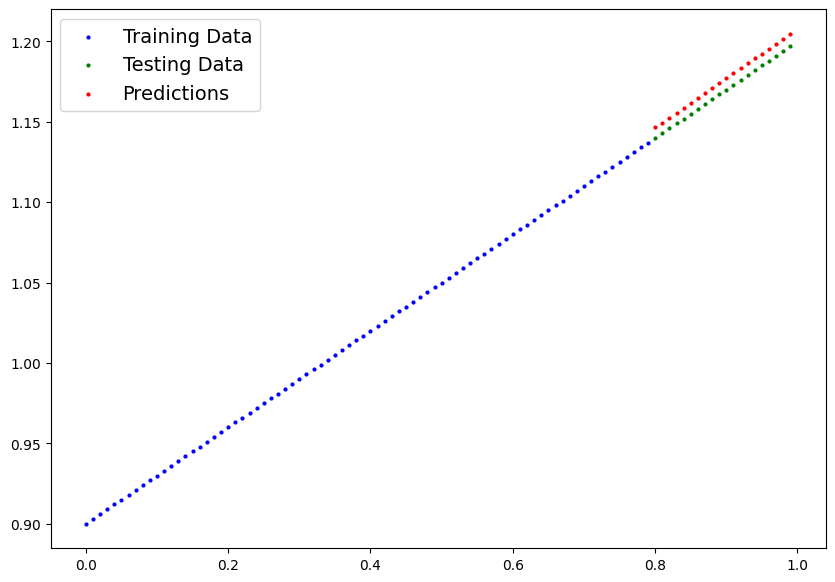

In [21]:
plot_predictions(predictions=y_preds)